In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/preprocessed_data_a.csv')
data.head()

,sex,age,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,control,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,55,1,0,0,0,0,0,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3
1,0,48,1,0,0,0,0,0,0,0,...,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,55,1,0,0,0,0,0,0,0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,50,1,0,0,0,0,0,0,0,...,83.0,0.0,0.0,0.0,46.8,0.0,0.0,0.0,0.0,0.0
4,0,57,1,0,0,0,0,0,0,0,...,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.metrics import classification_report

In [4]:
def cm_labels(cm):
    label_names = ['TN', 'FP', 'FN', 'TP']
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{ln}\n{c}\n{p}" for ln, c, p in zip(label_names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    return labels

In [5]:
def eval_metrics(y_test, title='Confusion Matrix', pred=None, pred_proba=None, multilabel=False):
    target_names = list(y_test.columns)    
    if multilabel:
#         for i, y in enumerate(y_test.columns):
#             accuracy = accuracy_score(y_test[y], pred[:, i])
#             print(f'{y} accuracy: {accuracy}')
        total_accuracy = accuracy_score(y_test, pred)
        print(f'total accuracy: {total_accuracy}')

        cms = multilabel_confusion_matrix(y_test, y_pred)
        for i, cm in enumerate(cms):
            fig, ax = plt.subplots()
            labels = cm_labels(cm)
            sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax).set(title=f'{title} - {target_names[i]}')
    else:
#         accuracy = accuracy_score(y_test, pred)
#         print(f'accuracy: {accuracy}')
        
        cm = confusion_matrix(y_test, pred)
        labels = cm_labels(cm)
        sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax).set(title=title)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    plt.show()
    
#     scores_dict = {
#         'accuracy': accuracy,
#         'precision': precision, 
#         'recall': recall, 
#         'f1': f1, 
#         'roc_auc': roc_auc
#     }
#     return scores_dict

In [6]:
target = data.iloc[:, 2:10]
features = data.drop(data.iloc[:, 2:10], axis=1)
target.head()

,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,control
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [7]:
data.shape

(5161, 85)

In [8]:
target.shape

(5161, 8)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Logistic Regression

## MultiOutputClassifier

In [11]:
params_dict = {
    'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
}

logreg = LogisticRegression(max_iter=10000, random_state=42)

grid_logreg = GridSearchCV(MultiOutputClassifier(logreg, n_jobs=4), params_dict, cv=3, refit=True)
grid_logreg.fit(x_train, y_train)

print(grid_logreg.best_params_)
print(grid_logreg.best_score_)

/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

{'estimator__C': 0.001}
0.6964631782945737


In [14]:
logreg = LogisticRegression(C=0.001, max_iter=6000, random_state=42)
multi_logreg = MultiOutputClassifier(logreg, n_jobs=4)
multi_logreg.fit(x_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(C=0.001, max_iter=6000,
                                                   random_state=42),
                      n_jobs=4)

In [15]:
# y_pred = grid_logreg.best_estimator_.predict(x_test)
y_pred = multi_logreg.predict(x_test)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [16]:
# y_pred_proba = grid_logreg.best_estimator_.predict_proba(x_test)
y_pred_proba = multi_logreg.predict_proba(x_test)
y_pred_proba

[array([[6.15829017e-01, 3.84170983e-01],
        [1.70677676e-01, 8.29322324e-01],
        [1.26510049e-01, 8.73489951e-01],
        ...,
        [1.12466338e-04, 9.99887534e-01],
        [9.38779594e-01, 6.12204059e-02],
        [6.06814362e-02, 9.39318564e-01]]),
 array([[7.05255889e-01, 2.94744111e-01],
        [9.49558188e-01, 5.04418123e-02],
        [8.19172305e-01, 1.80827695e-01],
        ...,
        [9.99578939e-01, 4.21060853e-04],
        [8.89895740e-01, 1.10104260e-01],
        [9.67209833e-01, 3.27901673e-02]]),
 array([[0.91308741, 0.08691259],
        [0.97971483, 0.02028517],
        [0.94862294, 0.05137706],
        ...,
        [0.99401243, 0.00598757],
        [0.96688568, 0.03311432],
        [0.73882089, 0.26117911]]),
 array([[0.88028926, 0.11971074],
        [0.99207998, 0.00792002],
        [0.96677683, 0.03322317],
        ...,
        [0.99650551, 0.00349449],
        [0.98598206, 0.01401794],
        [0.98929201, 0.01070799]]),
 array([[0.99503041, 0.00496

total accuracy: 0.7066795740561471
                                      precision    recall  f1-score   support

                                 OSA       0.95      0.93      0.94       781
                            insomnia       0.57      0.30      0.39       103
                           PLMD, RLS       0.72      0.39      0.51       107
                          parasomnia       0.62      0.14      0.22        37
circadian rhythm sleep-wake disorder       0.00      0.00      0.00        19
        Narcolepsy, EDS, Hypersomnia       0.38      0.14      0.20        22
                         Catathrenia       0.00      0.00      0.00         0
                             control       0.65      0.47      0.54        75

                           micro avg       0.89      0.74      0.81      1144
                           macro avg       0.49      0.30      0.35      1144
                        weighted avg       0.84      0.74      0.77      1144
                         sa

/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


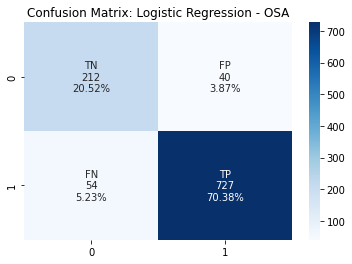

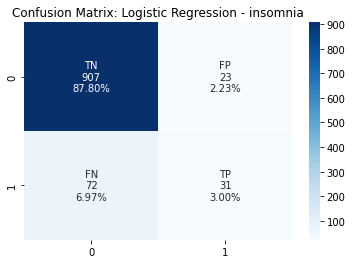

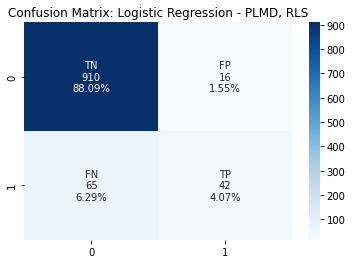

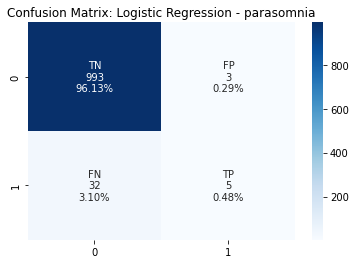

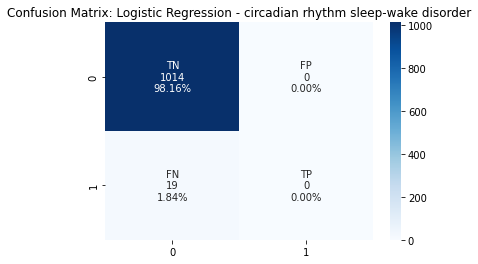

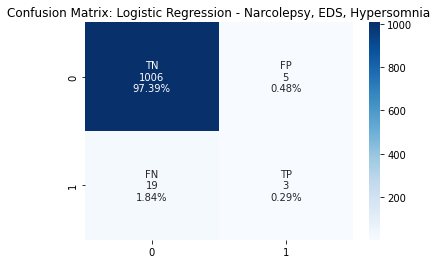

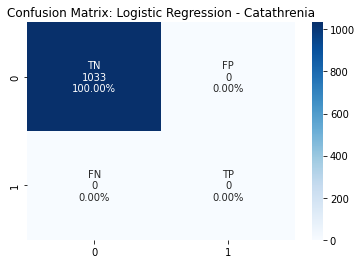

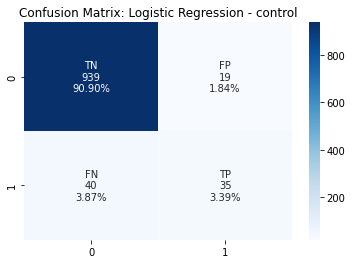

In [17]:
eval_metrics(y_test, title='Confusion Matrix: Logistic Regression', pred=y_pred, pred_proba=y_pred_proba, multilabel=True)

In [22]:
for c in target.columns:
    print(f'{c}: {data[data[c] == 1].shape}')

OSA: (3901, 85)
insomnia: (482, 85)
PLMD, RLS: (598, 85)
parasomnia: (212, 85)
circadian rhythm sleep-wake disorder: (94, 85)
Narcolepsy, EDS, Hypersomnia: (129, 85)
Catathrenia: (7, 85)
control: (379, 85)


data imbalance로 인해 circadian rhythm sleep-wake disorder, Catathrenia 예측이 어려움

## ClassifierChain

In [21]:
logreg = LogisticRegression(C=0.001, max_iter=6000, random_state=42)

chain_logreg = ClassifierChain(logreg, order='random', random_state=42)
chain_logreg.fit(x_train, y_train)

ClassifierChain(base_estimator=LogisticRegression(C=0.001, max_iter=6000,
                                                  random_state=42),
                order='random', random_state=42)

In [22]:
# y_pred = grid_logreg.best_estimator_.predict(x_test)
y_pred = chain_logreg.predict(x_test)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
# y_pred_proba = grid_logreg.best_estimator_.predict_proba(x_test)
y_pred_proba = chain_logreg.predict_proba(x_test)
y_pred_proba

array([[3.90261648e-01, 2.94712872e-01, 8.79340933e-02, ...,
        1.10203860e-02, 3.93288803e-04, 2.07695272e-02],
       [8.30335811e-01, 5.04721378e-02, 2.03779563e-02, ...,
        1.94518013e-03, 2.13487575e-04, 2.39064099e-02],
       [8.75837126e-01, 1.80780186e-01, 5.15006705e-02, ...,
        4.55670695e-03, 2.76713469e-04, 3.13975598e-03],
       ...,
       [9.99882490e-01, 4.21018671e-04, 5.98916083e-03, ...,
        7.82333985e-03, 2.20267207e-06, 1.19979750e-05],
       [6.20334783e-02, 1.10167323e-01, 3.29618256e-02, ...,
        2.07740477e-01, 4.76712152e-02, 7.59197007e-01],
       [9.39946624e-01, 3.27877507e-02, 2.61296590e-01, ...,
        1.31862216e-02, 1.32753926e-04, 6.55834770e-04]])

total accuracy: 0.7086156824782188
                                      precision    recall  f1-score   support

                                 OSA       0.95      0.93      0.94       781
                            insomnia       0.57      0.30      0.39       103
                           PLMD, RLS       0.72      0.39      0.51       107
                          parasomnia       0.62      0.14      0.22        37
circadian rhythm sleep-wake disorder       0.00      0.00      0.00        19
        Narcolepsy, EDS, Hypersomnia       0.38      0.14      0.20        22
                         Catathrenia       0.00      0.00      0.00         0
                             control       0.64      0.48      0.55        75

                           micro avg       0.89      0.74      0.81      1144
                           macro avg       0.49      0.30      0.35      1144
                        weighted avg       0.84      0.74      0.77      1144
                         sa

/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


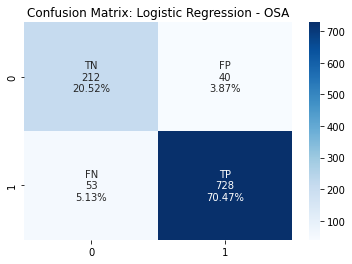

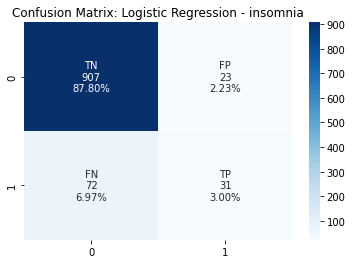

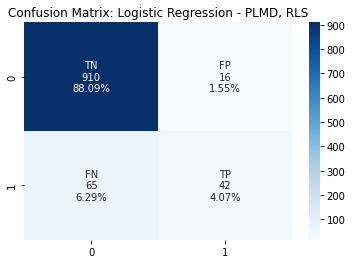

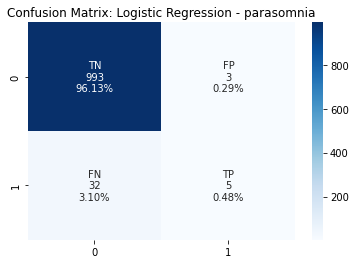

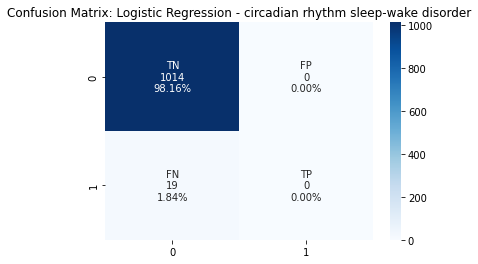

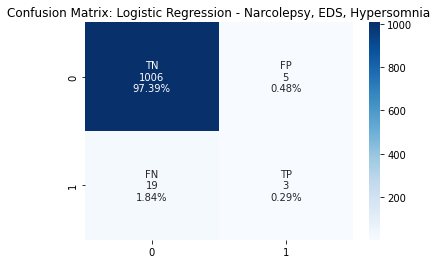

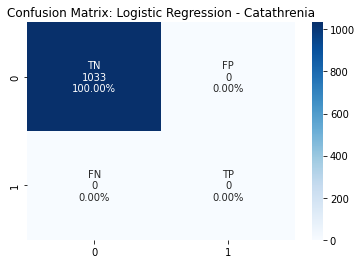

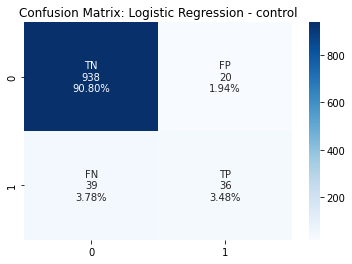

In [24]:
eval_metrics(y_test, title='Confusion Matrix: Logistic Regression', pred=y_pred, pred_proba=y_pred_proba, multilabel=True)

### MLSMOTE
ref: https://www.kaggle.com/code/tolgadincer/upsampling-multilabel-data-with-mlsmote/notebook

In [26]:
from sklearn.neighbors import NearestNeighbors
import random

In [27]:
def get_tail_label(df: pd.DataFrame, ql=[0.05, 1.]) -> list:
    """
    Find the underrepresented targets.
    Underrepresented targets are those which are observed less than the median occurance.
    Targets beyond a quantile limit are filtered.
    """
    irlbl = df.sum(axis=0)
    irlbl = irlbl[(irlbl > irlbl.quantile(ql[0])) & ((irlbl < irlbl.quantile(ql[1])))]  # Filtering
    irlbl = irlbl.max() / irlbl
    threshold_irlbl = irlbl.median()
    tail_label = irlbl[irlbl > threshold_irlbl].index.tolist()
    return tail_label

def get_minority_samples(X: pd.DataFrame, y: pd.DataFrame, ql=[0.05, 1.]):
    """
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    tail_labels = get_tail_label(y, ql=ql)
    index = y[y[tail_labels].apply(lambda x: (x == 1).any(), axis=1)].index.tolist()
    
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X: pd.DataFrame, neigh) -> list:
    """
    Give index of 10 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs = NearestNeighbors(n_neighbors=neigh, metric='euclidean', algorithm='kd_tree').fit(X)
    euclidean, indices = nbs.kneighbors(X)
    return indices

def MLSMOTE(X, y, n_sample, neigh=5):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X, neigh=5)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0, n-1)
        neighbor = random.choice(indices2[reference, 1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val > 0 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbor,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    return new_X, target

In [45]:
X_sub, y_sub = get_minority_samples(features, target)  # Getting minority samples of that datframe
X_res, y_res = MLSMOTE(X_sub, y_sub, 10000, 10)  # Applying MLSMOTE to augment the dataframe